# KoNLPy 설치
- java 환경변수 설정 해야함
    - JAVA_HOME 추가 -> 경로는 jre로 하면됨 bin이전까지)
    - PATH 편집 -> %JAVA_HOME%\bin 추가

- 
- Jpype 다운로드 : https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype

- Jpype를 각자 파이썬 버전에 맞게(강사님의 경우에는 3.10버전) 다운로드 받아주세요!

- JPype1-1.4.0-cp310-cp10-win_amd64.whl

- pip install C:\ksj(들어있는 파일)\JPype1-1.4.0-cp310-cp310-win_amd64.whl

- pip install konlpy


# 형태소 분석 
- konlpy의 형태소 분석, 태깅 라이브러리
  - Hannanum :한나눔. KAIST Semantic Web Research Center 개발
    - http://semanticweb.kaist.ac.kr/hannanum/

  - Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
    - http://kkma.snu.ac.kr/

  - Komoran: 코모란. Shineware에서 개발.
    - https://github.com/shin285/KOMORAN

  - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
    - https://github.com/open-korean-text/open-korean-text

- 여기에서는 한나눔, 꼬꼬마, 오픈코리안텍스트 형태소만 예제로 포함하였다.

 - 형태소 분석기 공통적 기능
    - nouns : 명사추출
    - morphs : 형태소 추출
    - pos 형태소 추출과 품사태깅

In [1]:
from konlpy.tag import *
Hannanum =Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()
import konlpy
konlpy.__version__

'0.6.0'

In [2]:
#대한민국 헌법 말뭉치 가져오기
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [3]:
c=kolaw.open('constitution.txt').read()
print(c[:50])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임


In [4]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [5]:
d = kobill.open('1809890.txt').read()
print(d[:50])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의


In [6]:
Hannanum.nouns(c[:50])


['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동', '건립', '대한민국임']

In [7]:
kkma.nouns(c[:50])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동',
 '건립',
 '대한민국임',
 '임']

In [8]:
komoran.pos(c[:50])


[('대한민국', 'NNP'),
 ('헌법', 'NNP'),
 ('유구', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKB'),
 ('빛나', 'VV'),
 ('는', 'ETM'),
 ('우리', 'NP'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('국민', 'NNP'),
 ('은', 'JX'),
 ('3', 'SN'),
 ('·', 'SP'),
 ('1', 'SN'),
 ('운동', 'NNP'),
 ('으로', 'JKB'),
 ('건립', 'NNG'),
 ('되', 'XSV'),
 ('ㄴ', 'ETM'),
 ('대한민국', 'NNP'),
 ('임', 'NNP')]

In [9]:
#용어를 모를때 tagset을 사용하면 됨
komoran.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [10]:
okt.nouns(c[:50])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임']

In [11]:
s='나는 자랑스러운 대한민국 육군입니까??? ㅗ'
okt.pos(s)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('자랑스러운', 'Adjective'),
 ('대한민국', 'Noun'),
 ('육', 'Modifier'),
 ('군입', 'Noun'),
 ('니까', 'Josa'),
 ('???', 'Punctuation'),
 ('ㅗ', 'KoreanParticle')]

In [12]:
okt.morphs(s)

['나', '는', '자랑스러운', '대한민국', '육', '군입', '니까', '???', 'ㅗ']

In [13]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from nltk import Text
from matplotlib import font_manager, rc

In [14]:
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


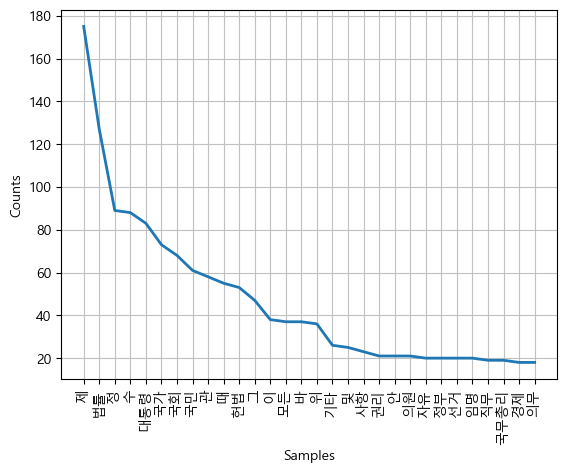

In [15]:
kolaw=Text(okt.nouns(c), name='kolaw')
kolaw.plot(30)
plt.show()

In [16]:
kv=kolaw.vocab()
kv1=kv.most_common(10)
kv2=dict()
for tag, count in kv.items():
    if(len(tag))>1:
        kv2[tag] = count
kv


FreqDist({'제': 175, '법률': 127, '정': 89, '수': 88, '대통령': 83, '국가': 73, '국회': 68, '국민': 61, '관': 58, '때': 55, ...})

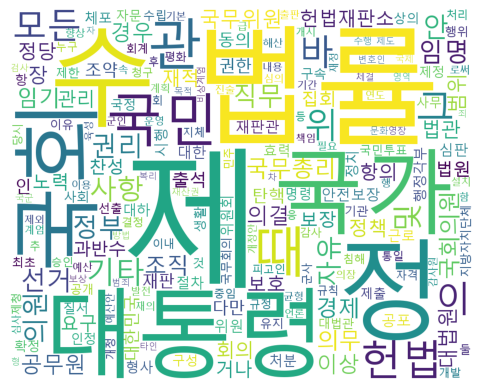

In [17]:
from wordcloud import WordCloud
font_path = 'c:/Windows/Fonts/malgun.ttf'
wc =WordCloud(width=1000, height=800, background_color='white', font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kv))
plt.axis('off')
plt.show()

In [18]:
#이것을 사용해도 빈도수를 구할 수 있음
from collections import Counter

In [19]:
nouns= okt.nouns(c)
counter=Counter(nouns)
# print(counter)
#most_common()을 쓰면 이쁘게 정렬됨
counter1 = counter.most_common(10)
# counter1

counter2=dict()
for tag, count in counter.items():
    if(len(tag)>1) and (count>20):
        counter2[tag] = count
counter2

{'헌법': 53,
 '국민': 61,
 '모든': 37,
 '권리': 21,
 '국회': 68,
 '법률': 127,
 '국가': 73,
 '기타': 26,
 '사항': 23,
 '대통령': 83,
 '의원': 21}

In [20]:
f=open('data/naver_news.txt', encoding='utf-8')
data=f.read()
print(data)

홍콩 배우 주윤발(저우룬파·周潤發)이 건강이상설에 휩싸였다. 중국 연예매체 시나연예가 홍콩 매체를 인용 보도한 내용에 따르면 그는 영화 '별규아도신' 홍보에 열을 올리던 이달 초 코로나19 확진 판정을 받아 홍보 일정을 모두 취소했다. 이후 상태가 점차 나빠져 뇌졸중으로 인한 혼수상태에 빠졌다는 건강이상설이 제기되고 있다. 해당 보도 만으로는 정확한 질환이나 발병 원인을 가늠하기 어렵다.

다만 뇌졸중은 국내 사망 원인 4위를 차지할 정도로 위험한 질환이자 돌연사의 주범으로 꼽힌다. 근본적으로 치료할 수 있는 유일한 방법은 평소 뇌졸중 증상을 숙지하고 있다가 이상 증상이 발생했을 때 즉시 처치 가능한 병원을 방문하는 것이다. 하지만 아직도 증상을 파악하지 못한 나머지 대처가 늦어져 신경학적 후유증이 남거나 심할 경우 목숨을 잃는 안타까운 사례도 발생한다.

뇌졸중은 혈관의 문제로 뇌가 손상되고 뇌기능에 문제가 생기는 뇌혈관질환을 통칭하는 용어다. 그 중에서도 뇌혈관이 막혀서 생기는 뇌졸중을 뇌경색, 뇌혈관이 터져서 생기는 뇌졸중을 뇌출혈이라고 한다. 뇌졸중으로 통칭하는 이유는 두 병의 증상이 매우 비슷하기 때문이다. 뇌경색은 막힌 혈관 때문에 혈액이 뇌로 가지 못하면서 뇌세포가 죽는 병이고 뇌출혈은 혈관이 터져서 새어나온 피 때문에 뇌세포가 죽는 병이다. 시작은 다르지만 결국 뇌세포가 파괴된다는 점에서 동일하다.

뇌경색이 발생하는 원인은 크게 세 가지로 나뉜다. 혈관이 좁아지거나 막히는 죽상경화증이 원인이거나 몸 어딘가에 생긴 혈전이 혈관을 따라 흐르다가 뇌혈관을 막는 경우, 고혈압 또는 노화로 인해 작은 혈관들이 딱딱해지면서 막히는 경우다. 뇌출혈은 뇌로 들어가는 모세혈관이 터지는 뇌실질내 출혈, 동맥류의 약해진 부분이 압력을 받으며 풍선처럼 부풀다가 터지는 거미막하 출혈로 나뉜다. 그 밖에 외상에 의한 출혈도 발생할 수 있다. 뇌출혈은 고혈압과 노화 등이 주요 원인으로 지목된다. 쉽게 말하면 혈관의 약해진 부분이 높은 혈압 때문에 터진다.

증상이 나타났

In [21]:
nouns_news = okt.nouns(data)
counter=Counter(nouns_news)
counter

counter2=dict()
for tag, count in counter.items():
    if(len(tag)>1) and (count>1):
        counter2[tag] = count
counter2

{'홍콩': 2,
 '건강': 2,
 '이상설': 2,
 '연예': 2,
 '매체': 2,
 '보도': 2,
 '내용': 2,
 '홍보': 2,
 '모두': 2,
 '취소': 2,
 '이후': 2,
 '상태': 3,
 '뇌졸중': 20,
 '해당': 2,
 '질환': 4,
 '원인': 6,
 '다만': 2,
 '국내': 2,
 '정도': 6,
 '치료': 7,
 '평소': 2,
 '증상': 15,
 '숙지': 2,
 '이상': 4,
 '발생': 6,
 '병원': 4,
 '방문': 2,
 '후유증': 3,
 '경우': 4,
 '혈관': 9,
 '문제': 2,
 '뇌혈관': 6,
 '통칭': 2,
 '뇌경색': 3,
 '뇌출혈': 4,
 '매우': 2,
 '때문': 5,
 '혈액': 2,
 '가지': 4,
 '세포': 4,
 '고혈압': 4,
 '노화': 2,
 '출혈': 3,
 '부분': 2,
 '특징': 2,
 '팔다리': 3,
 '마비': 7,
 '전체': 3,
 '환자': 5,
 '다른': 2,
 '사람': 3,
 '실어증': 2,
 '구음': 2,
 '장애': 2,
 '발음': 2,
 '기관': 4,
 '상황': 2,
 '위험': 4,
 '지속': 2,
 '정밀검사': 2,
 '더욱': 2,
 '먼저': 2,
 '통해': 3,
 '입원': 2,
 '관리': 3,
 '검사': 4,
 '사이': 2,
 '재발': 4,
 '예방': 3,
 '퇴원': 2,
 '반드시': 2,
 '운동': 3,
 '효과': 2,
 '매일': 2,
 '서울': 4,
 '경제': 2,
 '인기': 2,
 '한국': 9,
 '유승준': 7,
 '입국': 4,
 '대한': 2,
 '법원': 2,
 '유씨': 5,
 '네티즌': 7,
 '고법': 2,
 '행정부': 2,
 '원고': 2,
 '행위': 2,
 '사회': 2,
 '대해': 4,
 '외국': 2,
 '군대': 2,
 '미국': 4,
 '이외': 2,
 '정부': 4,
 '북한': 9,
 '박광호': 2,
 '대북': 5,
 '

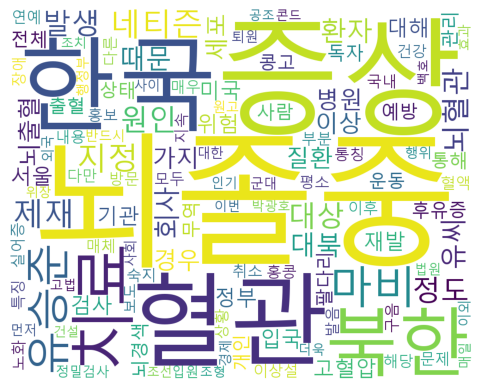

In [22]:
wc=WordCloud(width=1000, height=800, background_color='white', random_state=0, font_path=font_path)
plt.imshow(wc.generate_from_frequencies(counter2))
plt.axis('off')
plt.show()

In [23]:
#WordCloud대신 비슷한거 만드는법
! pip install pygame
! pip install pytagcloud
! pip install  simplejson

In [28]:
import pytagcloud
count3 = counter.most_common(50)

#태그 리스트 작성하는것(리스트의 형태값은 투플로 되어있어야함)
taglist=pytagcloud.make_tags(count3, maxsize=80)

# pytagClound 이미지를 만드는것
pytagcloud.create_tag_image(taglist, 'data/pycloud.png', size=(900,900), fontname='Nobile', rectangular=False)

[{'color': (57, 166, 131), 'size': 90, 'tag': '뇌졸중'},
 {'color': (137, 135, 211), 'size': 72, 'tag': '증상'},
 {'color': (39, 18, 31), 'size': 53, 'tag': '것'},
 {'color': (38, 148, 78), 'size': 53, 'tag': '뇌'},
 {'color': (129, 59, 39), 'size': 53, 'tag': '등'},
 {'color': (25, 36, 65), 'size': 49, 'tag': '혈관'},
 {'color': (140, 48, 175), 'size': 49, 'tag': '한국'},
 {'color': (54, 12, 12), 'size': 49, 'tag': '북한'},
 {'color': (125, 24, 56), 'size': 45, 'tag': '수'},
 {'color': (17, 182, 144), 'size': 40, 'tag': '치료'},
 {'color': (161, 172, 41), 'size': 40, 'tag': '마비'},
 {'color': (215, 216, 100), 'size': 40, 'tag': '유승준'},
 {'color': (111, 99, 30), 'size': 40, 'tag': '네티즌'},
 {'color': (35, 24, 33), 'size': 40, 'tag': '제재'},
 {'color': (90, 219, 56), 'size': 40, 'tag': '지정'},
 {'color': (55, 94, 121), 'size': 36, 'tag': '이'},
 {'color': (52, 142, 202), 'size': 36, 'tag': '그'},
 {'color': (33, 65, 107), 'size': 36, 'tag': '원인'},
 {'color': (150, 190, 92), 'size': 36, 'tag': '정도'},
 {'color'